# Projeto prático 4

## O desafio:

Propor um projeto que envolva previsão ou classificação em um contexto real, como previsão do tempo

## Implementação:

Com o dataset fornecido usar os algoritmos de aprendizado de máquina para resolver o problema, como KNN, Regressão Linear e Regressão Logística.

Além disso, aplicar métricas para ver o desempenho de cada algoritmo.

Assim, podemos ver e inferir qual o melhor para determinadas situações, e por fim aplicar um Comitê de Classificadores para determinar se existe uma melhora na acurácia.

## Importando as bibliotecas

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#
#from datetime import datetime as dt
#
from matplotlib import pyplot as plt
import seaborn as sns
#
import pandas as pd
import numpy as np

<hr>
<section>
    <p>TRAIN_TEST_SPLIT</p>
    <a>https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html</a>
    <br>
    <br>
    <p>REGRESSAO LINEAR</p>
    <a>https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html</a>
    <br>
    <br>
</section>
<hr>

## Importando o dataset

In [3]:
path_to_raw_file = "./datasets/raw/Energy_consumption.csv"
df_energy_consumption_raw = pd.read_csv(path_to_raw_file, sep = ",")

## Verificando uma breve prévia do dataset

In [4]:
df_energy_consumption_raw.sample(10)

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
362,2022-01-16 02:00:00,25.463027,43.334269,1061.813330,3,On,Off,6.616040,Sunday,Yes,91.265100
54,2022-01-03 06:00:00,29.956879,56.788806,1864.732366,8,On,Off,4.938738,Friday,Yes,91.871965
665,2022-01-28 17:00:00,22.732507,38.515304,1759.967378,8,On,Off,15.879972,Tuesday,Yes,73.283935
472,2022-01-20 16:00:00,23.066247,47.454388,1103.750573,7,Off,Off,14.902751,Sunday,No,67.071147
124,2022-01-06 04:00:00,22.045110,33.324258,1735.080411,0,On,On,14.780812,Tuesday,No,65.981422
668,2022-01-28 20:00:00,28.184623,51.848877,1964.605688,2,Off,On,27.964739,Sunday,No,73.205783
272,2022-01-12 08:00:00,25.006287,38.080501,1766.627016,3,On,Off,17.590872,Wednesday,Yes,86.849286
273,2022-01-12 09:00:00,20.703181,41.905365,1494.202548,4,On,On,27.689632,Friday,Yes,66.848675
45,2022-01-02 21:00:00,29.988046,51.196630,1516.752703,2,On,Off,16.104960,Monday,No,90.981476
293,2022-01-13 05:00:00,27.326782,51.074811,1920.440780,0,Off,On,0.702589,Thursday,Yes,72.643215


## Informações básicas do dataset

### Breve resumo

In [5]:
df_energy_consumption_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Timestamp          1000 non-null   object 
 1   Temperature        1000 non-null   float64
 2   Humidity           1000 non-null   float64
 3   SquareFootage      1000 non-null   float64
 4   Occupancy          1000 non-null   int64  
 5   HVACUsage          1000 non-null   object 
 6   LightingUsage      1000 non-null   object 
 7   RenewableEnergy    1000 non-null   float64
 8   DayOfWeek          1000 non-null   object 
 9   Holiday            1000 non-null   object 
 10  EnergyConsumption  1000 non-null   float64
dtypes: float64(5), int64(1), object(5)
memory usage: 86.1+ KB


### Quantidade de linhas (entradas para cada feature)

In [6]:
print("A quantidade de linhas é:", df_energy_consumption_raw.shape[0])

A quantidade de linhas é: 1000


Temos então que há 11 colunas (features) e 1000 linhas (entradas)

## Modificando o dataset original

### Substituindo os valores 'On' e 'Off' por '1' e '0'

#### Novos valores

In [7]:
new_binary_values = {
    "On": 1,
    "Off": 0
}

##### Executando a troca

In [8]:
df_energy_consumption_processed = df_energy_consumption_raw
df_energy_consumption_processed["LightingUsage"] = df_energy_consumption_processed["LightingUsage"].map(new_binary_values)
df_energy_consumption_processed["HVACUsage"] = df_energy_consumption_processed["HVACUsage"].map(new_binary_values)

### Substituindo os valores 'Yes' e 'No' por '1' e '0'

#### Novos valores

In [9]:
new_binary_values = {
    "Yes": 1,
    "No": 0
}

##### Executando a troca

In [10]:
df_energy_consumption_processed["Holiday"] = df_energy_consumption_processed["Holiday"].map(new_binary_values)

### Substituindo os valores de dias da semana por valores numéricos

#### Imprimindo os valores existentes no dataset

In [11]:
df_energy_consumption_raw["DayOfWeek"].unique()

array(['Monday', 'Saturday', 'Sunday', 'Wednesday', 'Friday', 'Thursday',
       'Tuesday'], dtype=object)

#### Novos valores

In [12]:
new_days_of_week_values = {
    "Monday" : 1,
    "Saturday" : 6,
    "Sunday" : 0,
    "Wednesday" : 3,
    "Friday" : 5,
    "Thursday" : 4,
    "Tuesday" : 2
}

- Sunday:
  - seu novo valor é 0
- Saturday:
  - seu novo valor é 6

##### Executando a troca

In [13]:
df_energy_consumption_processed["DayOfWeek"] = df_energy_consumption_processed["DayOfWeek"].map(new_days_of_week_values)

### Como ficou o dataset tratado

In [14]:
df_energy_consumption_processed.sample(10)

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
952,2022-02-09 16:00:00,27.003291,42.480581,1662.270886,9,0,0,15.603829,3,0,76.356418
368,2022-01-16 08:00:00,29.454845,39.189050,1279.299707,9,1,0,21.637530,1,0,89.003574
147,2022-01-07 03:00:00,20.796724,34.411356,1294.459691,5,0,0,26.349524,4,1,76.138955
824,2022-02-04 08:00:00,21.797741,52.264932,1133.230885,3,1,0,10.277351,3,0,75.978266
709,2022-01-30 13:00:00,26.981393,59.456978,1652.144627,0,1,0,7.693715,3,1,80.059886
453,2022-01-19 21:00:00,20.220087,44.555511,1586.284522,2,0,0,8.202103,0,0,61.896415
43,2022-01-02 19:00:00,20.516186,40.918500,1114.230124,8,0,1,20.489098,1,1,66.202098
747,2022-02-01 03:00:00,28.089946,42.005468,1808.636055,6,0,0,0.993963,5,0,72.957830
420,2022-01-18 12:00:00,28.153784,47.012486,1938.017891,8,0,1,1.470031,4,0,73.075136
95,2022-01-04 23:00:00,27.755159,39.848107,1355.385220,8,1,0,6.843563,3,1,86.646922


## Modificando os nomes das colunas do dataset

### Passando os nomes das colunas de Inglês para Português

#### Os nomes das colunas

In [15]:
df_energy_consumption_processed.columns

Index(['Timestamp', 'Temperature', 'Humidity', 'SquareFootage', 'Occupancy',
       'HVACUsage', 'LightingUsage', 'RenewableEnergy', 'DayOfWeek', 'Holiday',
       'EnergyConsumption'],
      dtype='object')

#### Dicionário para mudança de nomes

In [16]:
new_column_name = {
    "Timestamp" : "data_hora",
    "Temperature" : "temperatura",
    "Humidity" : "humidade",
    "SquareFootage" : "area_pes",
    "Occupancy" : "qtd_pessoas",
    "HVACUsage" : "ar_condicionado",
    "LightingUsage" : "uso_luz",
    "RenewableEnergy" : "energia_renovavel",
    "DayOfWeek" : "dia_semana",
    "Holiday" : "feriado",
    "EnergyConsumption" : "consumo_energia"
}

#### Realizando a mudança

In [17]:
df_energy_consumption_processed.columns = df_energy_consumption_processed.columns.to_series().map(new_column_name)
df_energy_consumption_processed.columns

Index(['data_hora', 'temperatura', 'humidade', 'area_pes', 'qtd_pessoas',
       'ar_condicionado', 'uso_luz', 'energia_renovavel', 'dia_semana',
       'feriado', 'consumo_energia'],
      dtype='object')

## Modificando os tipos dos dados do dataset

### Verificando os tipos

In [18]:
df_energy_consumption_processed.dtypes

data_hora             object
temperatura          float64
humidade             float64
area_pes             float64
qtd_pessoas            int64
ar_condicionado        int64
uso_luz                int64
energia_renovavel    float64
dia_semana             int64
feriado                int64
consumo_energia      float64
dtype: object

### Tipo Datetime

In [19]:
df_energy_consumption_processed["data_hora"] = pd.to_datetime(df_energy_consumption_processed["data_hora"])

### Tipo categórico

In [20]:
df_energy_consumption_processed["ar_condicionado"] = df_energy_consumption_processed["ar_condicionado"].astype("category")
df_energy_consumption_processed["dia_semana"] = df_energy_consumption_processed["dia_semana"].astype("category")
df_energy_consumption_processed["feriado"] = df_energy_consumption_processed["feriado"].astype("category")
df_energy_consumption_processed["uso_luz"] = df_energy_consumption_processed["uso_luz"].astype("category")

### Tipo inteiro

In [21]:
df_energy_consumption_processed["qtd_pessoas"] = df_energy_consumption_processed["qtd_pessoas"].astype("uint8")

### Imprimindo os novos tipos

In [22]:
df_energy_consumption_processed.dtypes

data_hora            datetime64[ns]
temperatura                 float64
humidade                    float64
area_pes                    float64
qtd_pessoas                   uint8
ar_condicionado            category
uso_luz                    category
energia_renovavel           float64
dia_semana                 category
feriado                    category
consumo_energia             float64
dtype: object

## Salvando o dataset modificado

In [23]:
path_to_processed_file = "./datasets/processed/"
file_name = "Energy_consumption.pkl"
df_energy_consumption_processed.to_pickle(path_to_processed_file + file_name)

## Análise Exploratória dos Dados (AED)

### Forma numérica

In [24]:
# COLUNA 'data_hora'
print("Data da primeira medição:", min(df_energy_consumption_processed["data_hora"]))
print("Data da última medição:", max(df_energy_consumption_processed["data_hora"]))
print("\n")

# COLUNA 'temperatura'
print("Valor mínimo da temperatura:", round(df_energy_consumption_processed["temperatura"].min(), 3))
print("Valor máximo da temperatura:", round(df_energy_consumption_processed["temperatura"].max(), 3))
print("Média da temperatura:", round(df_energy_consumption_processed["temperatura"].mean(), 3))
print("Mediana da temperatura:", round(df_energy_consumption_processed["temperatura"].median(), 3))
print("\n")

# COLUNA 'humidade'
print("Valor mínimo da humidade:", round(df_energy_consumption_processed["humidade"].min(), 3))
print("Valor máximo da humidade:", round(df_energy_consumption_processed["humidade"].max(), 3))
print("Média da humidade:", round(df_energy_consumption_processed["humidade"].mean(), 3))
print("Mediana da humidade:", round(df_energy_consumption_processed["humidade"].median(), 3))
print("\n")

# COLUNA 'area_pes'
print("Valor mínimo da área em pés:", round(df_energy_consumption_processed["area_pes"].min(), 3))
print("Valor máximo da área em pés:", round(df_energy_consumption_processed["area_pes"].max(), 3))
print("Média da área em pés:", round(df_energy_consumption_processed["area_pes"].mean(), 3))
print("Mediana da área em pés:", round(df_energy_consumption_processed["area_pes"].median(), 3))
print("\n")

# COLUNA 'qtd_pessoas'
print("Valor mínimo da quantidade de pessoas:", round(df_energy_consumption_processed["qtd_pessoas"].min(), 3))
print("Valor máximo da quantidade de pessoas:", round(df_energy_consumption_processed["qtd_pessoas"].max(), 3))
print("Média da quantidade de pessoas:", round(df_energy_consumption_processed["qtd_pessoas"].mean(), 3))
print("Mediana da quantidade de pessoas:", round(df_energy_consumption_processed["qtd_pessoas"].median(), 3))
print("\n")

# COLUNA 'ar_condicionado'
print("Contagem de ar condicionado desligado:", df_energy_consumption_processed.query("ar_condicionado == 0")["ar_condicionado"].agg(["count"]))
print("Contagem de ar condicionado ligado:", df_energy_consumption_processed.query("ar_condicionado == 1")["ar_condicionado"].agg(["count"]))
print("\n")

# COLUNA 'uso_luz'
print("Contagem de uso de luz desligado:", df_energy_consumption_processed.query("uso_luz == 0")["uso_luz"].agg(["count"]))
print("Contagem de uso de luz ligado:", df_energy_consumption_processed.query("uso_luz == 1")["uso_luz"].agg(["count"]))
print("\n")

# COLUNA 'energia_renovavel'
print("Valor mínimo da energia renovável:", round(df_energy_consumption_processed["energia_renovavel"].min(), 3))
print("Valor máximo da energia renovável:", round(df_energy_consumption_processed["energia_renovavel"].max(), 3))
print("Média da energia renovável:", round(df_energy_consumption_processed["energia_renovavel"].mean(), 3))
print("Mediana da energia renovável:", round(df_energy_consumption_processed["energia_renovavel"].median(), 3))
print("\n")

# COLUNA 'dia_semana'
print("Contagem de aparição dos dias da semana (domingo):", df_energy_consumption_processed.query("dia_semana == 0")["dia_semana"].agg(["count"]))
print("Contagem de aparição dos dias da semana (segunda)", df_energy_consumption_processed.query("dia_semana == 1")["dia_semana"].agg(["count"]))
print("Contagem de aparição dos dias da semana (terça):", df_energy_consumption_processed.query("dia_semana == 2")["dia_semana"].agg(["count"]))
print("Contagem de aparição dos dias da semana (quarta)", df_energy_consumption_processed.query("dia_semana == 3")["dia_semana"].agg(["count"]))
print("Contagem de aparição dos dias da semana (quinta):", df_energy_consumption_processed.query("dia_semana == 4")["dia_semana"].agg(["count"]))
print("Contagem de aparição dos dias da semana (sexta)", df_energy_consumption_processed.query("dia_semana == 5")["dia_semana"].agg(["count"]))
print("Contagem de aparição dos dias da semana (sábado):", df_energy_consumption_processed.query("dia_semana == 6")["dia_semana"].agg(["count"]))
print("\n")

# COLUNA 'feriado'
print("Contagem de dias que não eram feriado:", df_energy_consumption_processed.query("feriado == 0")["feriado"].agg(["count"]))
print("Contagem de dias que eram feriado:", df_energy_consumption_processed.query("feriado == 1")["feriado"].agg(["count"]))
print("\n")

# COLUNA 'consumo_energia'
print("Valor mínimo do consumo de energia:", round(df_energy_consumption_processed["consumo_energia"].min(), 3))
print("Valor máximo do consumo de energia:", round(df_energy_consumption_processed["consumo_energia"].max(), 3))
print("Média do consumo de energia:", round(df_energy_consumption_processed["consumo_energia"].mean(), 3))
print("Mediana do consumo de energia:", round(df_energy_consumption_processed["consumo_energia"].median(), 3))


Data da primeira medição: 2022-01-01 00:00:00
Data da última medição: 2022-02-11 15:00:00


Valor mínimo da temperatura: 20.008
Valor máximo da temperatura: 29.999
Média da temperatura: 24.982
Mediana da temperatura: 24.752


Valor mínimo da humidade: 30.016
Valor máximo da humidade: 59.969
Média da humidade: 45.395
Mediana da humidade: 45.972


Valor mínimo da área em pés: 1000.513
Valor máximo da área em pés: 1999.982
Média da área em pés: 1500.052
Mediana da área em pés: 1507.967


Valor mínimo da quantidade de pessoas: 0
Valor máximo da quantidade de pessoas: 9
Média da quantidade de pessoas: 4.581
Mediana da quantidade de pessoas: 5.0


Contagem de ar condicionado desligado: count    508
Name: ar_condicionado, dtype: int64
Contagem de ar condicionado ligado: count    492
Name: ar_condicionado, dtype: int64


Contagem de uso de luz desligado: count    509
Name: uso_luz, dtype: int64
Contagem de uso de luz ligado: count    491
Name: uso_luz, dtype: int64


Valor mínimo da energia re

### Forma gráfica

#### Verificando se o consumo de energia aumenta conforme a passagem de tempo

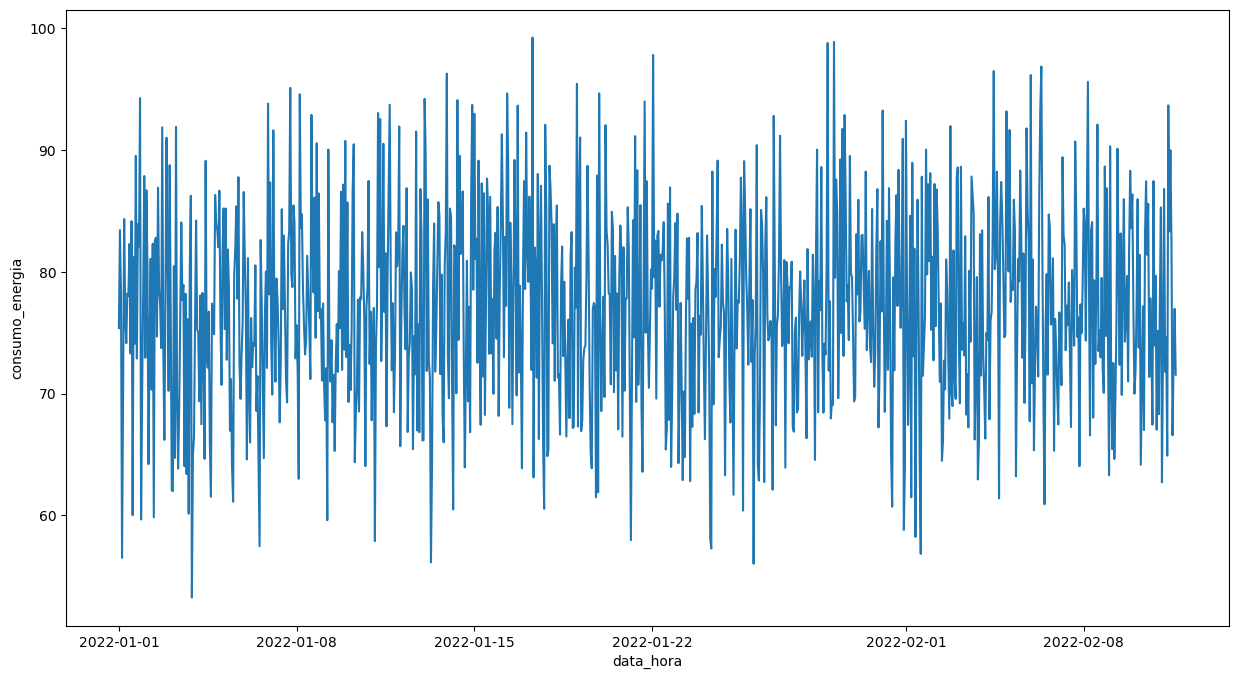

In [25]:
figure = plt.figure(figsize = (15, 8))
sns.lineplot(x = df_energy_consumption_processed["data_hora"], y = df_energy_consumption_processed["consumo_energia"], data = df_energy_consumption_processed)
plt.show()

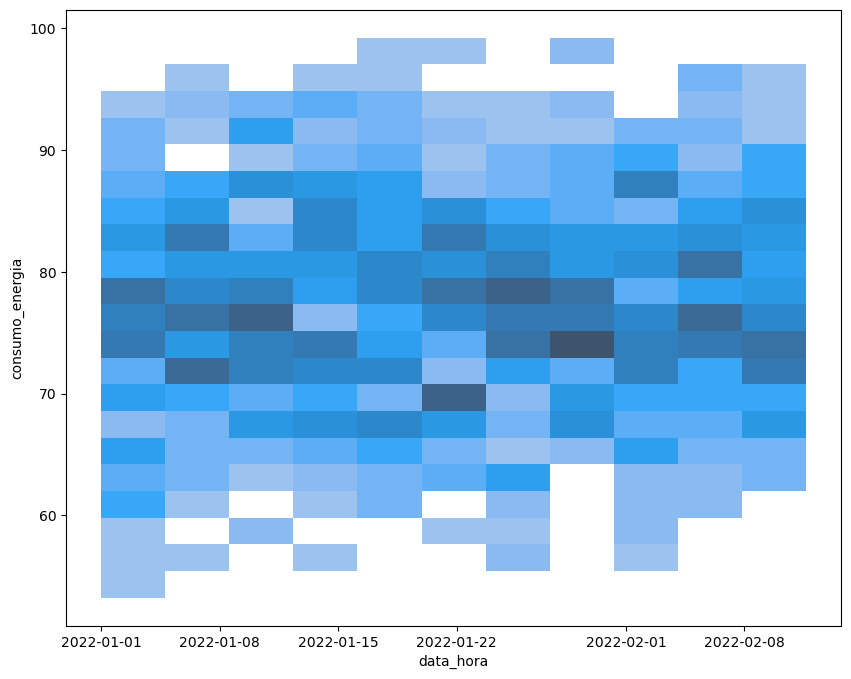

In [26]:
figure = plt.figure(figsize = (10, 8))
sns.histplot(x = df_energy_consumption_processed["data_hora"], y = df_energy_consumption_processed["consumo_energia"], data = df_energy_consumption_processed)
plt.show()

Não aumenta conforme a passagem de tempo. Podemos ver inúmeras ocilações no gráfico.

#### Verificando se o consumo de energia aumenta conforme há aumento na temperatura

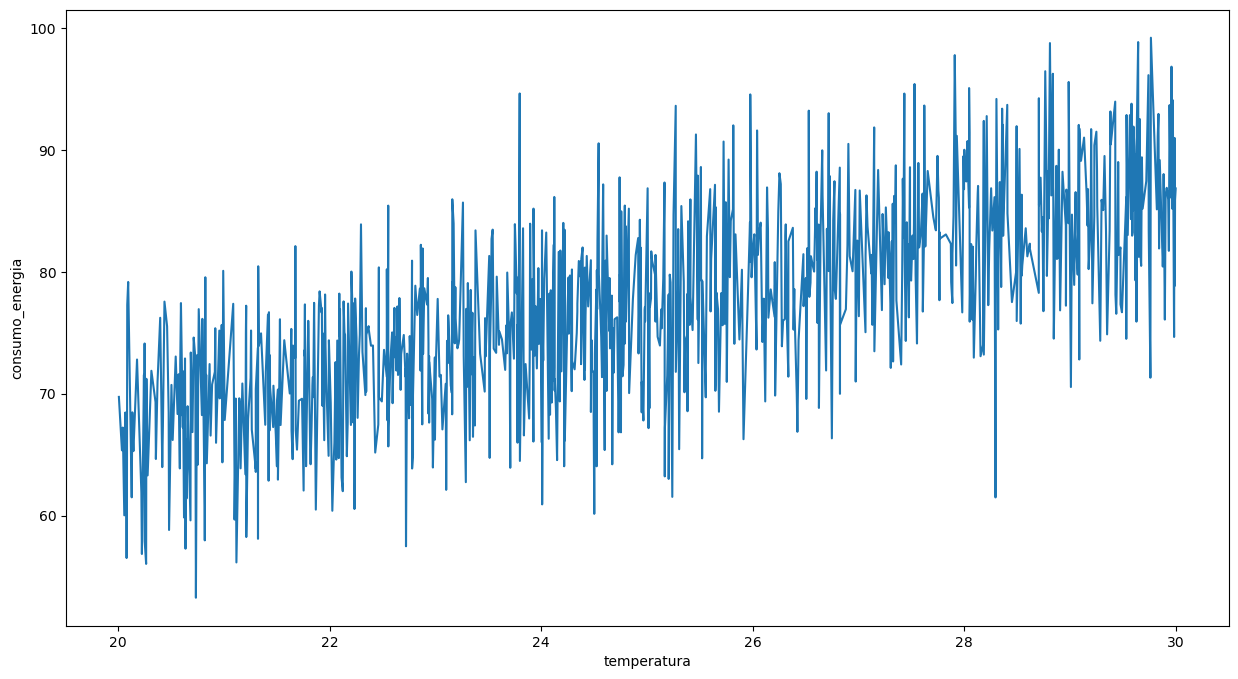

In [27]:
figure = plt.figure(figsize = (15, 8))
sns.lineplot(x = df_energy_consumption_processed["temperatura"], y= df_energy_consumption_processed["consumo_energia"], data = df_energy_consumption_processed)
plt.show()

Como podemos ver, de fato há aumento no consumo de energia em dias mais quentes

#### Verificando se o consumo de energia aumenta conforme há aumento na humidade reliativa do ar

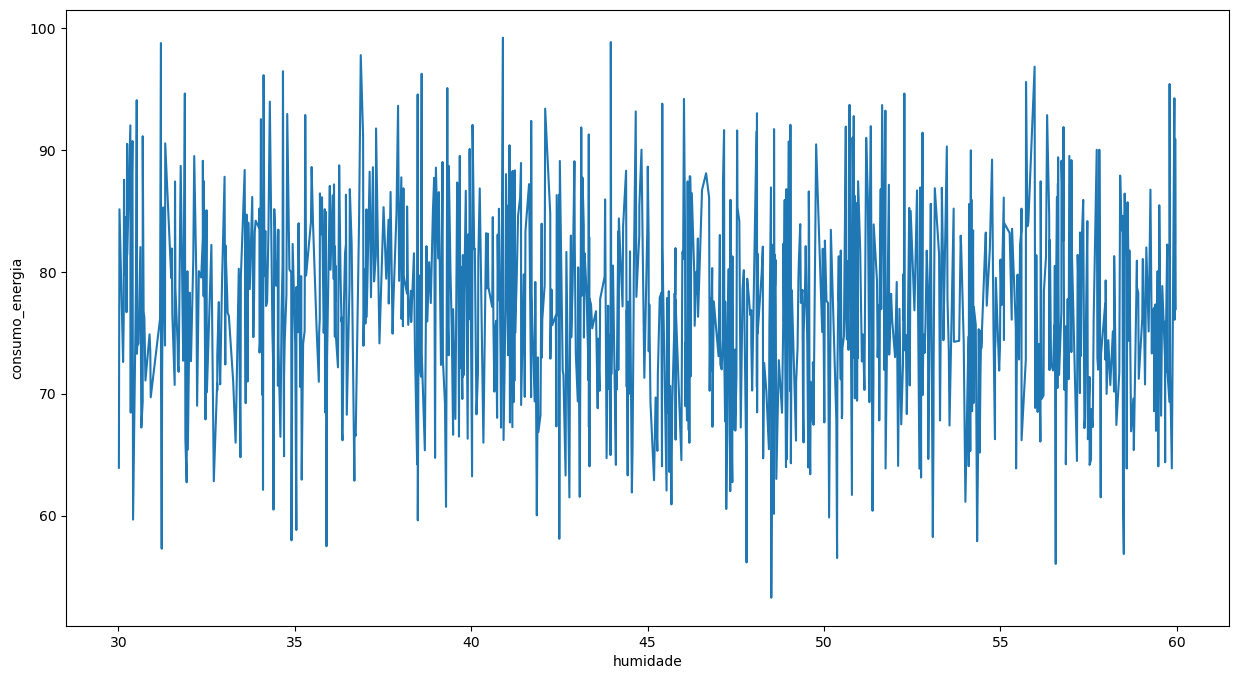

In [28]:
figure = plt.figure(figsize = (15, 8))
sns.lineplot(x = df_energy_consumption_processed["humidade"], y= df_energy_consumption_processed["consumo_energia"], data = df_energy_consumption_processed)
plt.show()

Como podemos ver, não há relação nenhuma entre o consumo de energia e a úmidade do ar.

Podemos verificar isso com o comportamento o gráfico, mesmo que haja grade variação, a tendencia é central, constante.

#### Verificando se o consumo de energia aumenta conforme há aumento quantidade de residentes na mesma casa

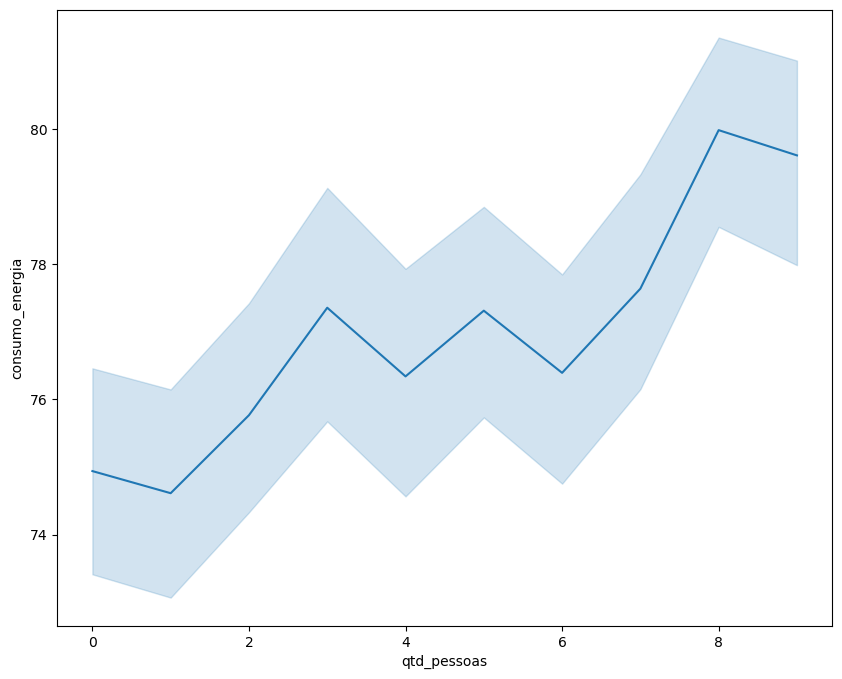

In [29]:
figure = plt.figure(figsize = (10, 8))
sns.lineplot(x = df_energy_consumption_processed["qtd_pessoas"], y = df_energy_consumption_processed["consumo_energia"], data = df_energy_consumption_processed)
plt.show()

De fato, houve grande aumento na conta de energia com maior número de residentes

#### Verificando se há relação entre a temperatura e humidade reliativa do ar

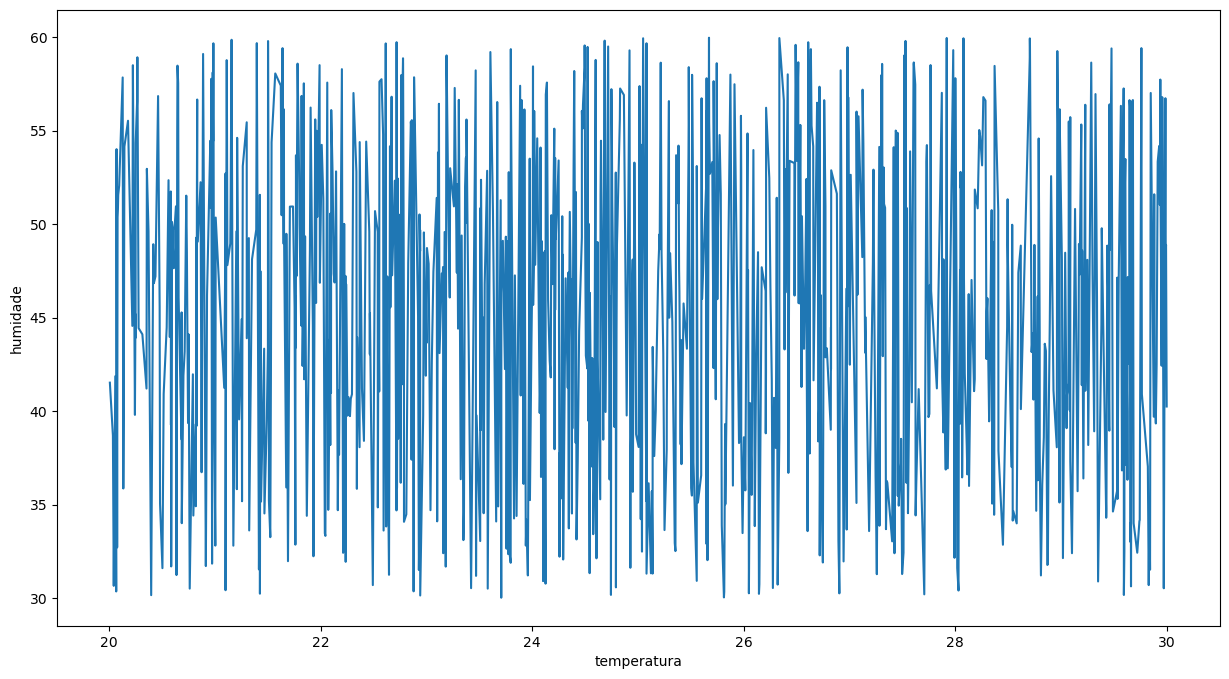

In [30]:
figure = plt.figure(figsize = (15, 8))
sns.lineplot(x = df_energy_consumption_processed["temperatura"], y= df_energy_consumption_processed["humidade"], data = df_energy_consumption_processed)
plt.show()

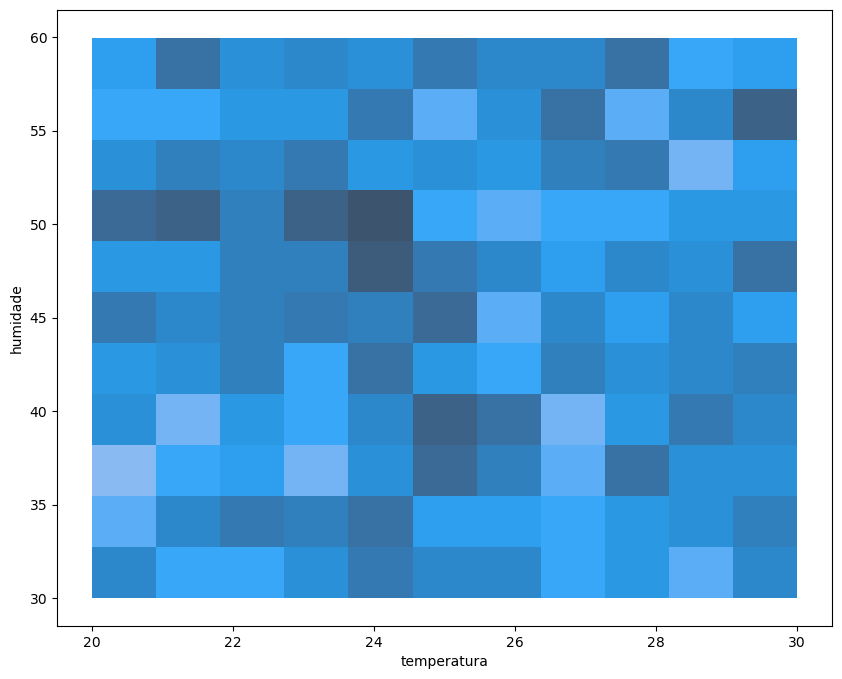

In [31]:
figure = plt.figure(figsize = (10, 8))
sns.histplot(x = df_energy_consumption_processed["temperatura"], y = df_energy_consumption_processed["humidade"], data = df_energy_consumption_processed)
plt.show()

Neste caso é difícil de visualisar. Vamos usar um heatmap para visualisar melhor:

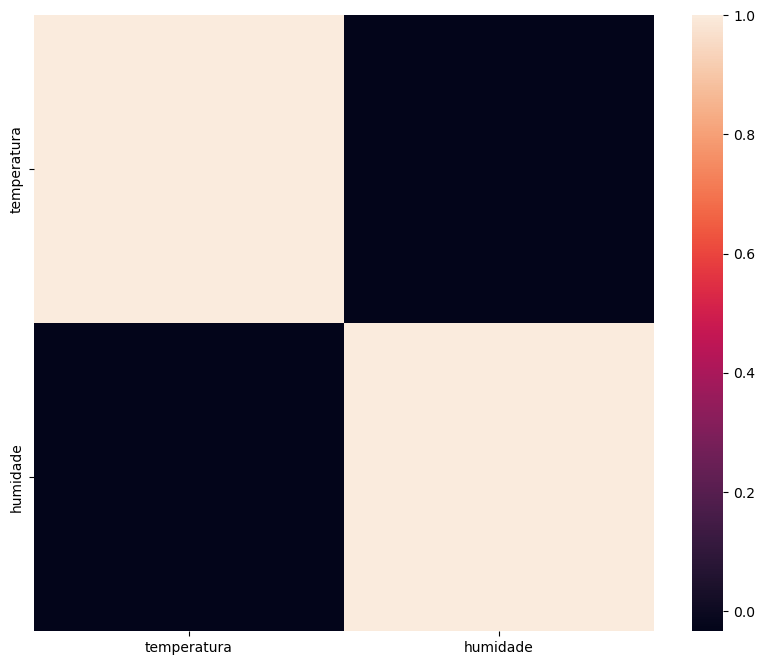

In [32]:
figure = plt.figure(figsize = (10, 8))
sns.heatmap(df_energy_consumption_processed[["temperatura", "humidade"]].corr())
plt.show()

Como podemos ver, de fato não há nenhuma relação entre as duas colunas (humidade e temperatura).

#### Verificando se o consumo de energia aumenta conforme o dia da semana

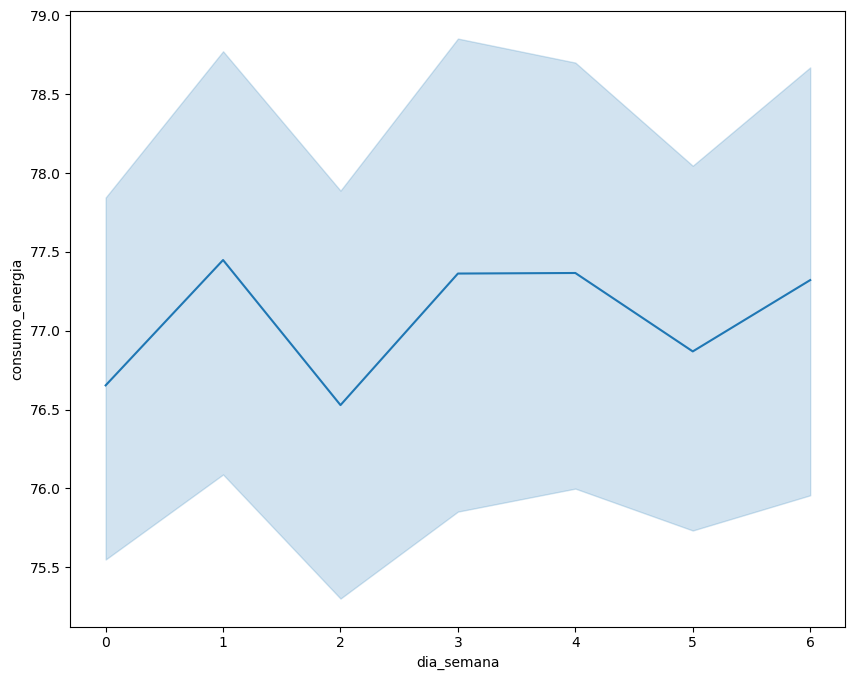

In [33]:
figure = plt.figure(figsize = (10, 8))
sns.lineplot(x = df_energy_consumption_processed["dia_semana"], y = df_energy_consumption_processed["consumo_energia"], data = df_energy_consumption_processed)
plt.show()

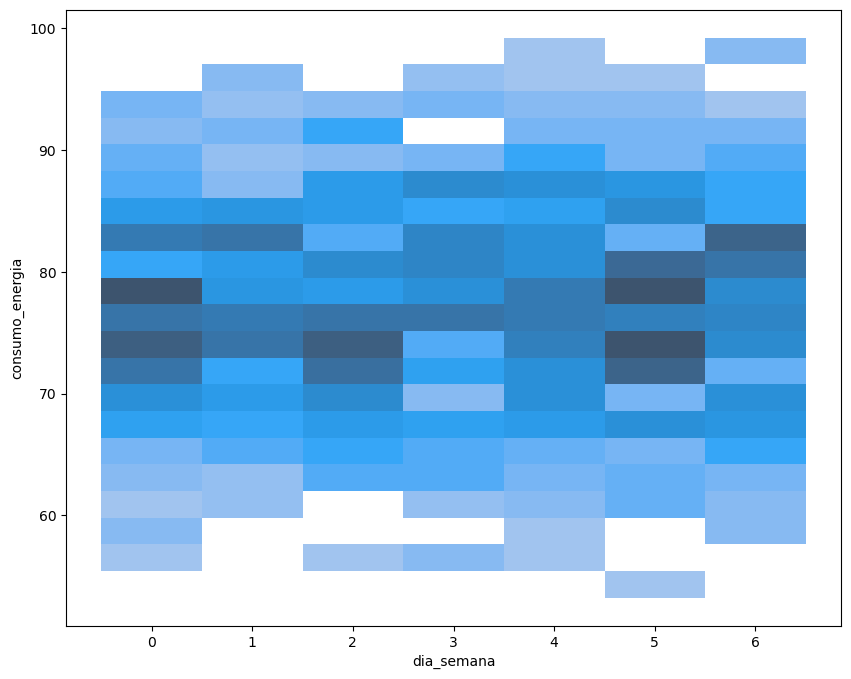

In [34]:
figure = plt.figure(figsize = (10, 8))
sns.histplot(x = df_energy_consumption_processed["dia_semana"], y = df_energy_consumption_processed["consumo_energia"], data = df_energy_consumption_processed)
plt.show()

Como podemos ver, não há nenhuma relação forte entre as duas colunas. Há aumentos e quedas de consumo em casos pontuais

#### Verificando há outliers no dataset

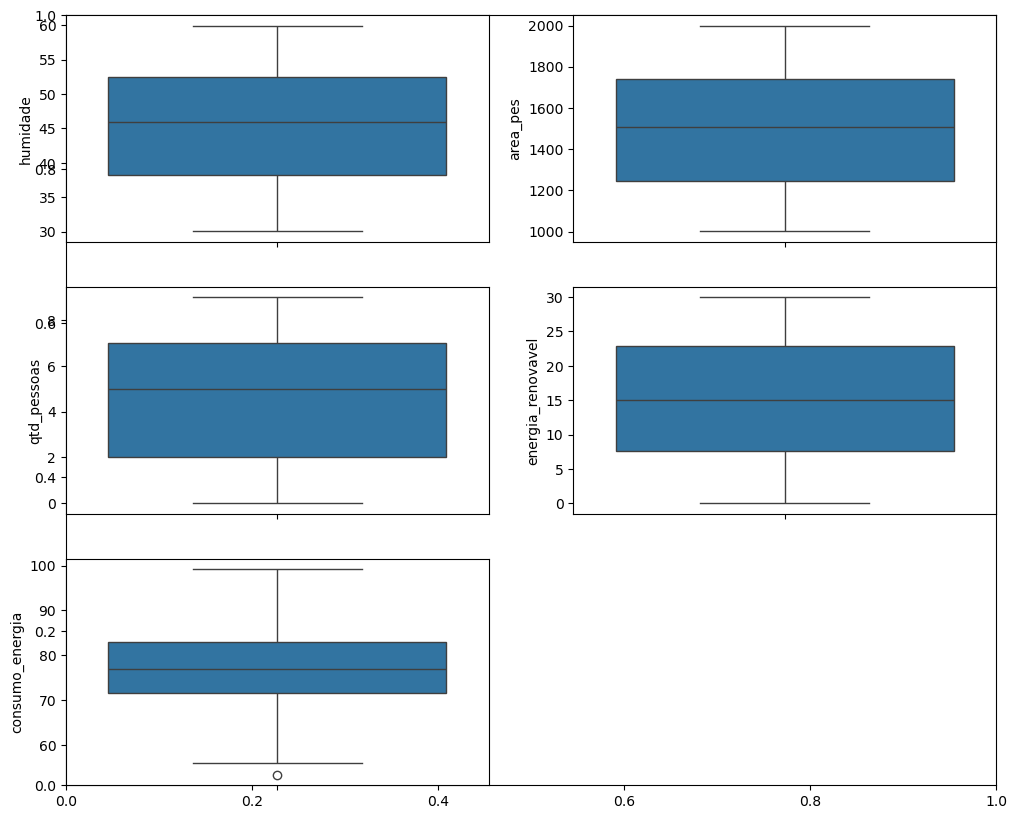

In [35]:
iterable_columns = df_energy_consumption_processed.select_dtypes(include = np.number).columns.to_list()
iterable_columns.pop(0)

figure = plt.subplots(figsize = (12, 10))
i = 1

for curr_column in iterable_columns:
    axis = plt.subplot(3, 2, i)
    sns.boxplot(df_energy_consumption_processed[curr_column], ax = axis)
    i += 1

plt.show()

Como podemos notar, há somente um único outlier na coluna `consumo_energia`. É preferível manter este único outlier do que reamovê-lo e gerar novos outliers com a modificação da mediana atual

#### Verificando as correlações entre as colunas do dataset 

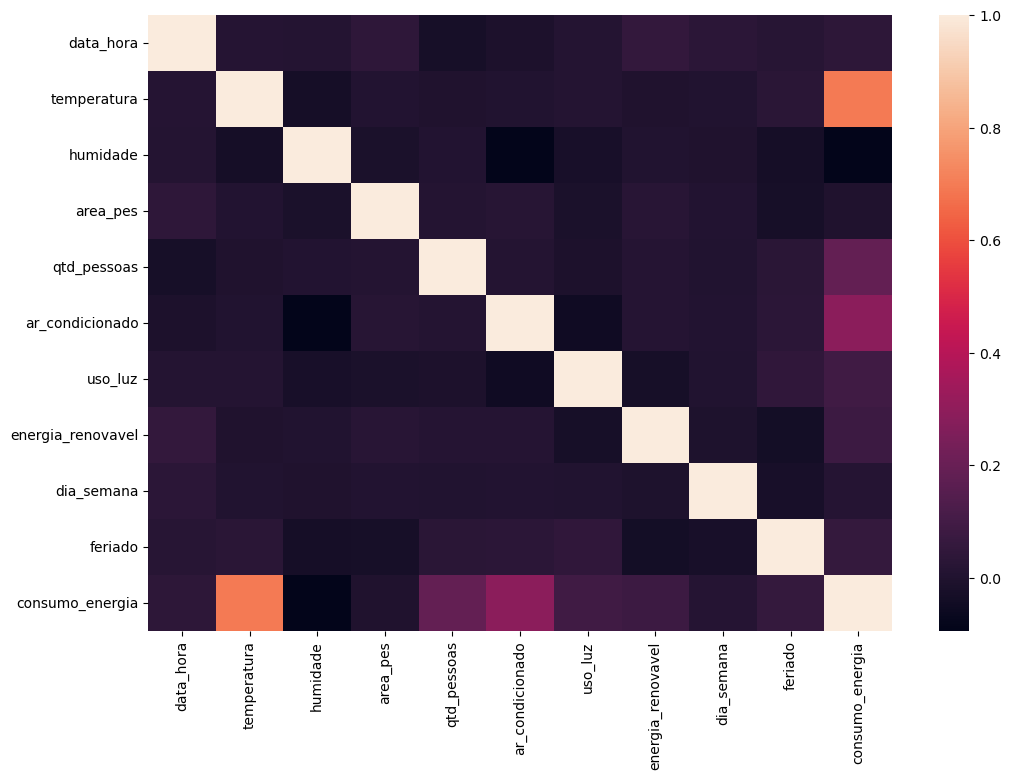

In [75]:
df_corr  = df_energy_consumption_processed.corr()

figure = plt.figure(figsize=(12, 8))
sns.heatmap(df_corr)
plt.show()

## Aplicando as técnicas de aprendizado de máquina

### Criando variáveis úteis

In [69]:
random_state = 45
linear_model = LinearRegression()

best_model = None

score_list_train = []
score_list_test = []

best_score_train = -100
best_score_test = -100

test_size = [i for i in np.arange(0.2, 0.8, 0.1)]
best_size_train = None
best_size_test = None

### Dividindo o dataset para o treinamento

In [70]:
X = df_energy_consumption_processed.iloc[:, 1:10]
y = df_energy_consumption_processed.iloc[:, 10]

### Treinando e testando os resultados dos modelos gerados

In [71]:
j = k = None

for curr_size, i in zip(test_size, range(0, len(test_size))):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = curr_size, random_state = random_state)
    fitted_model = linear_model.fit(x_train, y_train)
    score_list_train.append(fitted_model.score(x_train, y_train))
    score_list_test.append(fitted_model.score(x_test, y_test))
    
    if score_list_train[i] > best_score_train:
        best_score_train = score_list_train[i]
        best_size_train = curr_size
        j = i
        
    if score_list_test[i] > best_score_test:
        best_score_test = score_list_test[i]
        best_size_test = curr_size
        k = i
        best_model = fitted_model

### imprimindo os resultados

In [74]:
print(f"O maior score de treino foi: {best_score_train:.2f}\nSeu tamanho de teste foi:{best_size_train:.1f}\n")
print(f"O maior score de teste foi: {best_score_test:.2f}\nSeu tamanho de teste foi:{best_size_test:.1f}\n")

O maior score de treino foi: 0.66
Seu tamanho de teste foi:0.4

O maior score de teste foi: 0.61
Seu tamanho de teste foi:0.8

